In [6]:
import numpy as np
import matplotlib.pyplot as plt

★☆☆☆☆ - 3.02) Graficar la señal definida previamente de forma tal que se vea de la siguiente manera:


![ej_01](../imagenes/ej_01.png)



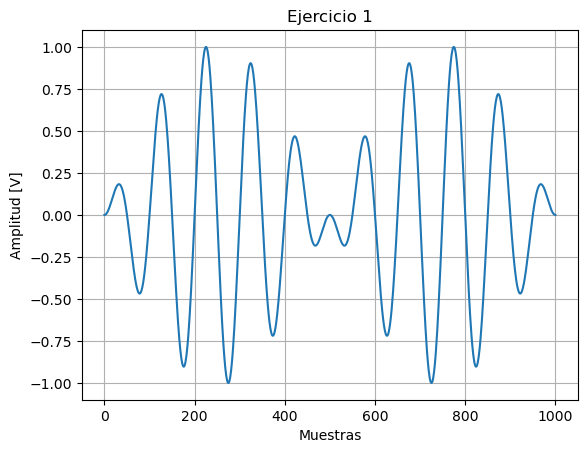

In [7]:
n = np.arange(1001)
x = np.sin(2*(1/1000)*np.pi*n) * np.sin(2*(1/100)*np.pi*n)
x = x/max(abs(x)) #Normalización de la señal, para que su valor máximo sea 1.

plt.figure()
plt.plot(n, x)
plt.title('Ejercicio 1')
plt.xlabel('Muestras')
plt.ylabel('Amplitud [V]')
plt.grid()
plt.show()

★★☆☆☆ - 3.03) A partir de la señal creada, generar un grafico que se vea de la siguiente manera:


![ej_02_b](../imagenes/ej_02_b.png)

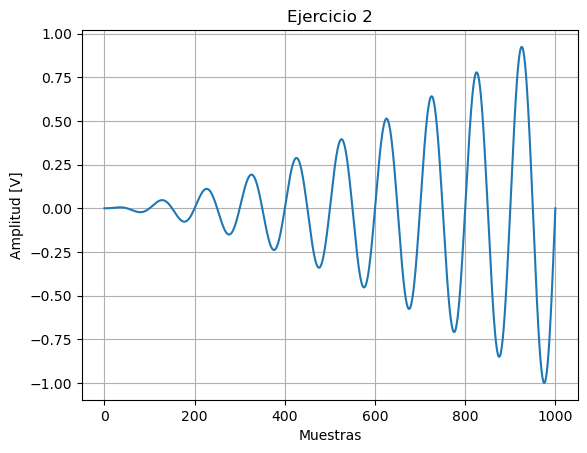

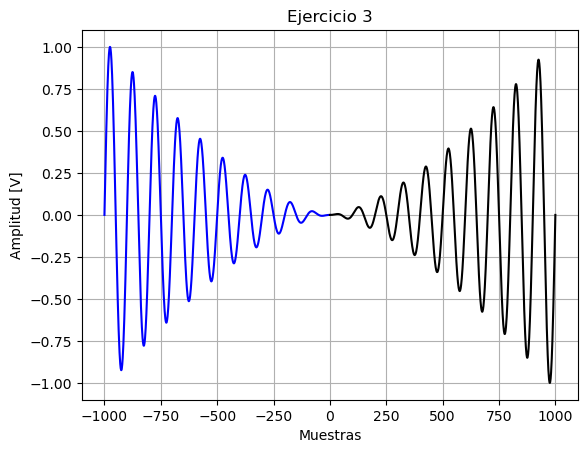

In [8]:
import math

n = np.arange(1001)
y = (n**1.5) * np.sin(2*(1/100)*np.pi*n)
y = y/max(abs(y)) #Normalización de la señal, para que su valor máximo sea 1.

plt.figure()
plt.plot(n, y)
plt.title('Ejercicio 2')
plt.xlabel('Muestras')
plt.ylabel('Amplitud [V]')
plt.grid()
plt.show()

n = np.arange(-1000,1001)
y_mirrored = (abs(n)**1.5) * np.sin(2*(1/100)*np.pi*n)
y_mirrored = y_mirrored/max(abs(y_mirrored))


x0 = int(math.floor(len(n)/2))

plt.figure()
plt.plot(n[:x0+1], y_mirrored[:x0+1], color="blue")
plt.plot(n[x0:], y_mirrored[x0:], color="black")
plt.title('Ejercicio 3')
plt.xlabel('Muestras')
plt.ylabel('Amplitud [V]')
plt.grid()
plt.show()

Consideremos un sistema cuya salida es el valor absoluto de su señal de entrada.

★★★☆☆ - 3.04) Representar mediante *subplots* la señal de entrada y de salida del sistema, de forma tal que se vea así:

![ej_03](../imagenes/ej_03.png)

DATA: La imagen tiene una relación de 10:8

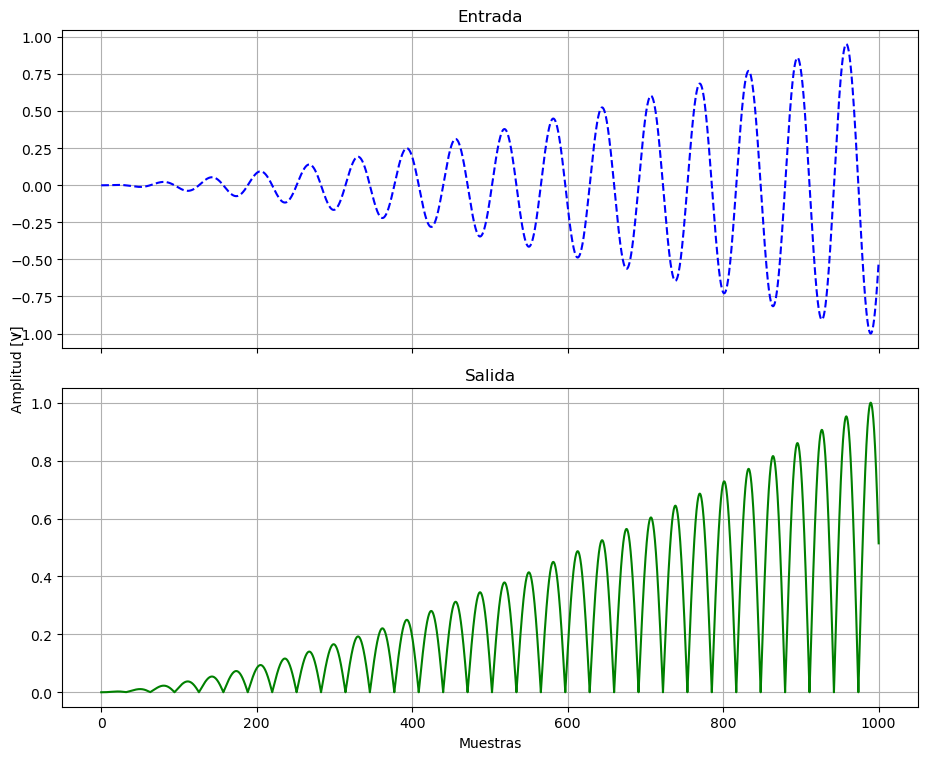

In [21]:
duration = 1000
n = np.linspace(0,1000,1000*duration)
y = (n**1.5)*np.sin(n/10)
y = y/max(abs(y))


fig, axs = plt.subplots(2,1, figsize=(10,8), sharex=True)
axs[0].plot(n,y, '--b')
axs[0].set_title('Entrada')
axs[0].grid()
axs[1].plot(n, abs(y), 'g')
axs[1].set_title('Salida')
axs[1].grid()

# axs[0].set_xlabel('Muestras')
# axs[1].set_xlabel('Muestras')
# axs[0].set_ylabel('Amplitud [V]')
# axs[1].set_ylabel('Amplitud [V]')
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.xlabel('Muestras')
plt.ylabel('Amplitud [V]')
plt.tight_layout()

plt.show()

★★☆☆☆ - 3.05) Definir un vector de 2 segundos con una frecuencia de muestreo de 100Hz, es decir, 100 muestras por segundo. Implementando ese vector temporal, graficar un seno y un coseno con frecuencia de 1Hz, de forma tal que se vea así:

![ej_04](../imagenes/ej_04.png)

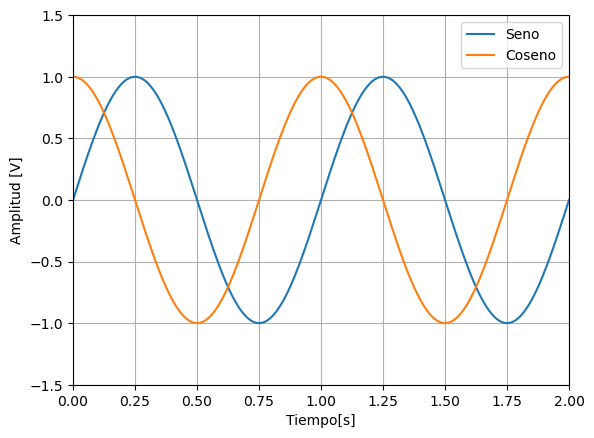

In [33]:
t = np.linspace(0,2,2*100)
sine = np.sin(2*np.pi*t)
cosine = np.cos(2*np.pi*t)

plt.figure()
plt.plot(t,sine,t,cosine)
plt.ylim(-1.5,1.5)
plt.xlim(0,2)
plt.ylabel('Amplitud [V]')
plt.xlabel('Tiempo[s]')
plt.legend(['Seno','Coseno'], loc='upper right')
plt.grid()
plt.show()

★★★☆☆ - 3.06) 

a) Generar un tono puro de 2 segundos de duración, junto con los tonos correspondientes a la quinta y la octava del tono fundamental (Ej: LA 440Hz, MI 660Hz, LA 880Hz), sumarlos y reproducir el acorde resultante. Guardar el array en un archivo .npy

b) En una nueva celda de código, cargar la señal y restarle los tonos correspondientes a la quinta y la octava, para finalmente reproducir el tono restante.

In [52]:
import IPython.display as ipd

sample_rate = 48000
T = 2
t = np.linspace(0, T, T*sample_rate)
f = [440, 660, 880]

tone_fundamental = np.sin(2*np.pi*f[0]*t)

chord = np.sin(2*np.pi*f[0]*t) + np.sin(2*np.pi*f[1]*t) + np.sin(2*np.pi*f[2]*t)
chord = chord/max(abs(chord))

ipd.Audio(chord, rate=sample_rate)


In [47]:
chord_processing = chord - np.sin(2*np.pi*f[1]*t) - np.sin(2*np.pi*f[2]*t)
# chord_processing = chord_processing/max(abs(chord_processing))

ipd.Audio(chord_processing, rate=sample_rate)

In [50]:
ipd.Audio(tone_fundamental, rate=sample_rate)

★★☆☆☆ - 3.07) Cargar un archivo wav (puede ser el audio.wav que se encuentra en la carpeta de la práctica), reducir 10 dB su amplitud y guardarlo. Graficar ambas formas de onda superpuestas.

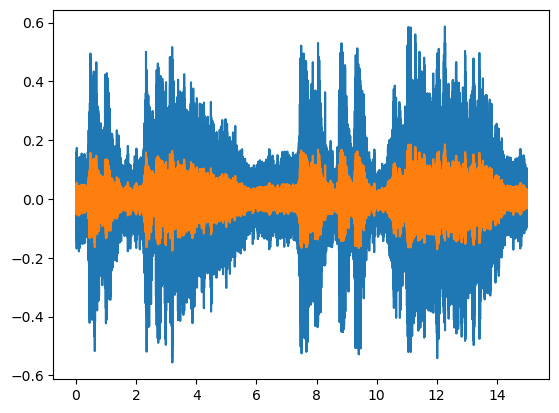

In [68]:
import soundfile as sf

audio, fs = sf.read('../audio.wav')
t = np.linspace(0, len(audio)/fs, len(audio))
reduction = 10

audio_processed = audio*10**(-abs(reduction)/20)
sf.write('../audio_processed.wav', data=audio_processed, samplerate=fs)

plt.figure()
plt.plot(t, audio, t, audio_processed)
plt.show()

★★★★☆ - 3.08) Crear una función que genere una señal en la que los valores de cada elemento sean el promedio de los n valores siguientes de la función de entrada. Es decir, si elegimos un n=50, el primer valor de la señal de salida debe ser el promedio de los primeros 50 valores de la señal de entrada (muestra 1 a 50), mientras que el segundo valor de salida debe ser el promedio entre el valor 2 y 51 de la señal de entrada, y así sucesivamente.

Por ultimo, reproducir la señal que se obtiene al pasar por la función creada.

Que efecto tiene este procesamiento en la señal original? Comentar lo que se considere al respecto.